
# Crash Course de Machine Learning con Scikit-learn

Este curso tiene como objetivo brindar una introducción rápida y práctica a las técnicas principales de Machine Learning utilizando Scikit-learn. Cubriremos clasificación, regresión, clustering, preprocesamiento, reducción de dimensiones, métricas de evaluación y gráficos, así como técnicas como la partición de datasets en entrenamiento y validación.

---

## Contenido

1. **Clasificación**
2. **Regresión**
3. **Clustering**
4. **Preprocesamiento**
5. **Reducción de Dimensiones**
6. **Métricas y Gráficos**
7. **Partición del Dataset**

---

## Diagrama de Algoritmos

A continuación se muestra un diagrama que resume las opciones de algoritmos en Scikit-learn, basado en la cantidad de datos, el tipo de tarea y otras características.

![Scikit-learn Algorithm Cheat Sheet](ml_map.png)

---

## 1. Clasificación

La clasificación se utiliza para predecir etiquetas categóricas. Por ejemplo, clasificar correos como spam o no spam.

### Algoritmos comunes
- **Regresión logística**
- **Árboles de decisión**
- **Random Forest**
- **SVM (Support Vector Machine)**
- **Naive Bayes**

### Métricas de evaluación
- **Accuracy:** Proporción de predicciones correctas.
- **Precision, Recall y F1-Score:** Métricas útiles para conjuntos desbalanceados.
- **Matriz de confusión:** Representación visual del desempeño.

### Código básico

Reporte de Clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



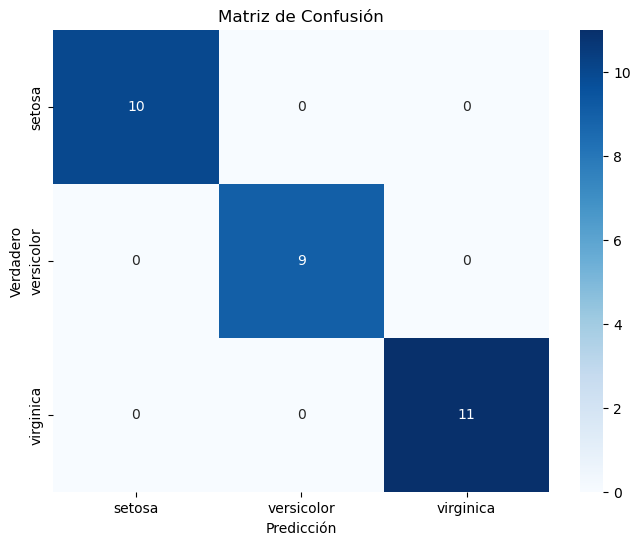

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Cargar el dataset Iris
iris = load_iris()
X, y = iris.data, iris.target

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones
predictions = model.predict(X_test)

# Imprimir reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_test, predictions, target_names=iris.target_names))

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions)
target_names = iris.target_names

# Crear una matriz de confusión más bonita
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Verdadero")
plt.show()


### Explicación:

1. **`classification_report`**:
   - Este informe muestra métricas clave para evaluar el rendimiento de un modelo de clasificación:
     - **Precisión (Precision):** Porcentaje de predicciones positivas correctas sobre todas las predicciones positivas.
     - **Exhaustividad (Recall o Sensitivity):** Porcentaje de verdaderos positivos detectados entre todos los casos reales positivos.
     - **F1-Score:** Media armónica de la precisión y el recall, equilibrando ambas métricas.
     - **Support:** Número de ocurrencias de cada clase en los datos reales.

2. **`confusion_matrix`**:
   - La matriz de confusión ilustra el número de predicciones correctas e incorrectas hechas por el modelo:
     - Las filas representan las clases reales.
     - Las columnas representan las clases predichas.
     - Los valores diagonales indican predicciones correctas (verdaderos positivos).

### Matriz de confusión:
En el gráfico, los datos reales están en el eje vertical (etiqueta "Verdadero"), y las predicciones están en el eje horizontal (etiqueta "Predicción"). Cada celda contiene el número de muestras que fueron clasificadas como cada combinación de clase real y predicha. El uso de colores facilita la visualización de los resultados. 

Por ejemplo:
- La clase "setosa" fue correctamente clasificada 10 veces.
- La clase "versicolor" fue correctamente clasificada 9 veces.
- La clase "virginica" fue correctamente clasificada 11 veces.

Esto refleja un excelente rendimiento del modelo para este conjunto de datos.

### **Dataset Iris**
El dataset **Iris** es uno de los conjuntos de datos más conocidos y utilizados en el aprendizaje automático y estadística. Fue introducido por el botánico **Ronald A. Fisher** en 1936 y contiene información sobre tres especies de flores del género *Iris*:

1. **Iris-setosa**  
2. **Iris-versicolor**  
3. **Iris-virginica**

El objetivo del dataset es clasificar las flores en estas tres especies basándose en sus características físicas.

---

### **Características del dataset**
- **Número de muestras:** 150 (50 por cada especie de flor).
- **Características (features):** 
  1. Longitud del sépalo (*sepal length*, en cm).
  2. Ancho del sépalo (*sepal width*, en cm).
  3. Longitud del pétalo (*petal length*, en cm).
  4. Ancho del pétalo (*petal width*, en cm).
- **Etiqueta objetivo (target):** Especies de las flores (*setosa*, *versicolor*, *virginica*).

---

### **Propósito del dataset**
El dataset Iris se utiliza principalmente en problemas de:
1. **Clasificación:** Predecir la especie de una flor con base en sus características físicas.
2. **Visualización:** Es ideal para demostrar técnicas como reducción de dimensionalidad, ya que tiene solo cuatro características.
3. **Pruebas de modelos:** Se utiliza como un primer paso para probar algoritmos de clasificación y clustering, dado su tamaño reducido y simplicidad.

---

### **Ejemplo de Uso**
Supongamos que queremos clasificar las flores usando las características del sépalo y pétalo. Este dataset es ideal debido a que las especies tienen cierta separación natural basada en las dimensiones de sus características.

Por ejemplo:
- **Iris-setosa** es fácilmente distinguible porque tiene pétalos más cortos y sépalos más anchos.
- **Iris-versicolor** y **Iris-virginica** tienen características más similares, lo que las hace más difíciles de clasificar, siendo un desafío para algunos modelos.

En resumen, el dataset Iris es un excelente punto de partida para aprender sobre clasificación supervisada y análisis exploratorio de datos.

### Explicación de las métricas

El **F1-Score** es una métrica utilizada en clasificación para equilibrar dos aspectos clave del rendimiento de un modelo: la **precisión (precision)** y la **exhaustividad (recall)**. 

#### Fórmula del F1-Score:
$$
F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

Donde:
- **Precision** es la proporción de predicciones positivas correctas entre todas las predicciones positivas realizadas:
  $$
  \text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
  $$
  (TP: verdaderos positivos, FP: falsos positivos).

- **Recall** es la proporción de predicciones positivas correctas entre todos los casos positivos reales:
  $$
  \text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
  $$
  (FN: falsos negativos).



---

## 2. Regresión

La regresión se utiliza para predecir valores continuos, como precios o temperaturas.

### Algoritmos comunes
- **Regresión lineal**
- **Elastic Net**
- **Random Forest Regressor**
- **SVR (Support Vector Regressor)**

### Métricas de evaluación
- **MSE (Error Cuadrático Medio):** Promedio de los errores al cuadrado.
- **RMSE (Raíz del MSE):** Medida más interpretable en unidades originales.
- **R² (Coeficiente de determinación):** Proporción de la varianza explicada.

### Código básico

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Cargar el dataset Boston Housing
boston = fetch_openml(data_id=531, as_frame=True)
X = boston.data
y = boston.target

# Convertir todas las columnas a numéricas, si es necesario
X = pd.get_dummies(X, drop_first=True)
y = pd.to_numeric(y)

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones
predictions = model.predict(X_test)

# Evaluación del modelo
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 24.82
R² Score: 0.66


### Dataset: Boston Housing (cargado desde `sklearn.datasets`)
El dataset de precios de viviendas en Boston (Boston Housing) es un conjunto de datos comúnmente usado en problemas de regresión. Contiene características como el número de habitaciones, la edad de las viviendas, o la distancia a zonas de empleo, con el objetivo de predecir el valor medio de las casas en miles de dólares.

---

### Explicación de las métricas de evaluación:
1. **Mean Squared Error (MSE)**:
   - Mide el promedio de los errores al cuadrado entre las predicciones y los valores reales.
   - Fórmula:
     $$
     \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
     $$
     Donde $y_i$ son los valores reales y $\hat{y}_i$ son las predicciones.
   - Valores más bajos indican un mejor ajuste.

2. **R² Score (Coeficiente de Determinación)**:
   - Mide qué tan bien las predicciones explican la variabilidad en los datos reales.
   - Fórmula:
     $$
     R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}
     $$
     Donde $\bar{y}$ es el promedio de los valores reales.
   - Un $R^2 = 1$ indica un ajuste perfecto. Un $R^2 < 0$ sugiere un modelo que no es útil.

---


### Interpretación del Ejemplo
- **Mean Squared Error (MSE):** Nos indica el error promedio al cuadrado entre los valores reales y las predicciones. Un MSE bajo refleja que las predicciones están cerca de los valores reales.
- **R² Score:** Nos muestra qué tan bien el modelo explica la variabilidad en los datos. Un \(R^2\) cercano a 1 indica que el modelo captura casi toda la variabilidad.

Este código utiliza el dataset **Boston Housing**, un conjunto de datos realista para problemas de regresión, y evalúa el desempeño del modelo usando métricas estándar.

---

## 3. Clustering

El clustering es una técnica de aprendizaje no supervisado que agrupa datos en clusters basados en similitudes.

### Algoritmos comunes
- **K-Means**
- **DBSCAN**
- **Gaussian Mixture Models (GMM)**

### Métricas de evaluación
- **Silhouette Score:** Mide la cohesión y separación de clusters.
- **Inertia:** Suma de las distancias cuadráticas dentro de cada cluster.

### Código básico

Silhouette Score: 0.55


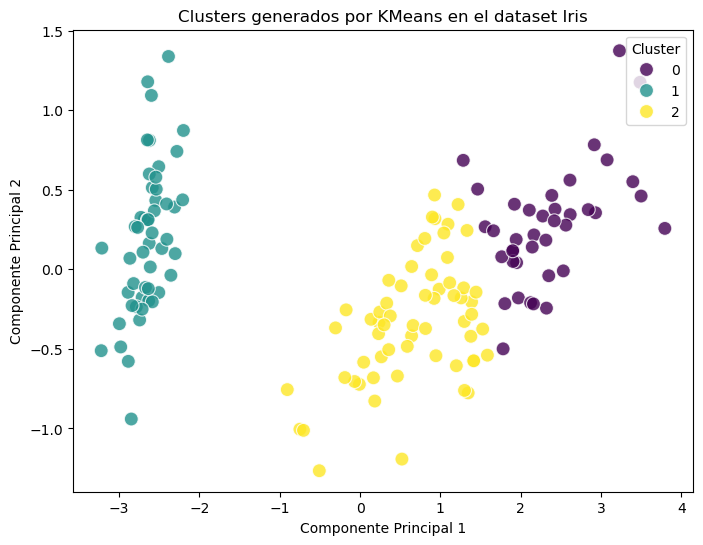

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Cargar el dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Aplicar KMeans para crear 3 clusters
model = KMeans(n_clusters=3, random_state=42)
clusters = model.fit_predict(X)

# Calcular el Silhouette Score
sil_score = silhouette_score(X, clusters)
print(f"Silhouette Score: {sil_score:.2f}")

# Reducir dimensiones a 2D usando PCA para graficar
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Crear un scatter plot de los clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_reduced[:, 0], y=X_reduced[:, 1], hue=clusters, palette="viridis", s=100, alpha=0.8
)
plt.title("Clusters generados por KMeans en el dataset Iris")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Cluster", loc="upper right")
plt.show()


### Explicación del código:

1. **Dataset Iris**:
   - Este dataset contiene 150 muestras de flores con 4 características (longitud y ancho del sépalo, longitud y ancho del pétalo).
   - El objetivo en este caso no es clasificar, sino identificar patrones de agrupamiento entre las muestras.

2. **KMeans**:
   - Es un algoritmo de clustering no supervisado que divide los datos en un número predefinido de grupos (clusters). Aquí elegimos 3 clusters, porque conocemos que hay 3 especies de flores.

3. **Silhouette Score**:
   - Es una métrica que evalúa la calidad del clustering:
     - Valores cercanos a 1 indican clusters bien separados y compactos.
     - Valores cercanos a 0 indican solapamiento entre clusters.
     - El valor obtenido de **0.55** sugiere que el modelo genera clusters razonables, pero no perfectos.

4. **PCA (Reducción de Dimensiones)**:
   - Reducimos las 4 dimensiones del dataset Iris a 2 para poder visualizar los clusters en un gráfico 2D.

5. **Gráfico**:
   - Los puntos representan las muestras del dataset.
   - Cada color indica un cluster generado por KMeans.
   - Las componentes principales 1 y 2 (PC1 y PC2) son ejes generados por PCA que explican la mayor variación en los datos.

Este análisis ilustra cómo agrupar datos usando KMeans y evaluar el resultado con el Silhouette Score, además de presentar los clusters de manera intuitiva.

---

## 4. Preprocesamiento

### Técnicas comunes
- **Estandarización:** Escalar datos para tener media 0 y desviación estándar 1.
- **Codificación categórica:** One-hot encoding o Label Encoding.
- **Imputación:** Rellenar valores faltantes.

### Código básico

In [4]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

---

## 5. Reducción de Dimensiones

La reducción de dimensiones simplifica datasets de alta dimensionalidad, conservando la mayor cantidad de información posible.

### Técnicas comunes
- **PCA (Análisis de Componentes Principales)**
- **t-SNE**
- **Isomap**

### Código básico

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

---

## 6. Métricas y Gráficos

### Para clasificación
- **Matriz de confusión**
- **Curvas ROC-AUC:** Evalúan el desempeño para múltiples umbrales.

### Para regresión
- **Gráficos de predicción vs valores reales**

---

## 7. Partición del Dataset

La partición del dataset en entrenamiento y validación es crucial para evitar sobreajuste.

### Código básico

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

---

## Conclusión

Este crash course proporciona una base sólida para comenzar a trabajar con Machine Learning utilizando Scikit-learn. ¡Explora los algoritmos y métricas para resolver tus problemas específicos!